# <center>Metody Numeryczne</center>

# Laboratorium 6: Iteracyjne równania liniowe i macierze rzadkie


**Wykonał:** \<Faustyna Kowalczyk>

<br>

### **Metoda zaliczenia:**

Podczas zajęć należy wykonać poniższe polecenia oraz udzielić odpowiedzi na pytania zamieszczone w treści zadań. 

Wszystkie funkcje wymagane w ramach ćwiczenia należy zaimplementować w pliku `main.py`. Poprawność ich działania należy zweryfikować za pomocą testów jednostkowych dostępnych w pliku `test_main.py`.

### **Cel zajęć:**

Celem zajęć jest zapoznanie się z numerycznymi metodami rozwiązywania układów równań liniowych w postaci macierzowej, w szczególności z wykorzystaniem rzadkich macierzy prostokątnych.


Dana jest prostokątna, [rzadka](https://en.wikipedia.org/wiki/Sparse_matrix) macierz $\mathbf{A}$ o wymiarach $m \times n$ oraz wektor kolumnowy $\mathbf{b}$ o wymiarach $m \times 1$. Należy rozwiązać układ równań postaci:
 
$$
\mathbf{Ax}=\mathbf{b}
$$
  
gdzie:
- $\mathbf{A}$ - macierz współczynników z lewej strony równania, 
- $\mathbf{x}$ - wektor kolumnowy zmiennych,
- $\mathbf{b}$ - wektor kolumnowy wyników prawej strony równania. 

Do oceny jakości rozwiązania wykorzystywać będziemy residuum (ang. *residual*):

$$
\mathbf{r}=\mathbf{b}-\mathbf{Ax}
$$


### **Uwagi wstępne:**
- Funkcje wymagające implementacji (lub zaimplementowane na poprzednich laboratoriach) oznaczone są pochyłą czcionką maszynową (np. *`my_func()`*).

- W skrypcie stosuje się następujące skróty:

    - `np` - `numpy`,
    - `sp` - `scipy`.

---

In [6]:
# !python -m pip install numpy scipy matplotlib

import main
import scipy as sp
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from pympler import asizeof
from scipy.sparse import diags

---

### **Zadanie 1.**

W macierzach rzadkich większość elementów jest zerami, więc przechowywanie całych macierzy w pamięci jest nieefektywne. W celu optymalizacji macierze te zapisuje się w przeznaczonych do tego [formatach przechowywania danych](https://docs.scipy.org/doc/scipy/reference/sparse.html#usage-information), jakie udostępnia m.in. moduł [`scipy.sparse`](https://docs.scipy.org/doc/scipy/reference/sparse.html). W ramach laboratorium korzystać będziemy z formatu [Compressed Sparse Column (CSC)](https://docs.scipy.org/doc/scipy/reference/generated/scipy.sparse.csc_array.html).

1. Zapoznaj się z różnymi formatami przechowywania macierzy rzadkich w pamięci.

2. Dla $10$ równo rozmieszczonych wartości $m$ z zakresu $[100, 10000]$ wygeneruj macierze rzadkie wymiaru $m \times m$ używając [`sp.sparse.random_array()`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.sparse.random_array.html) z parametrem `density=0.01` oraz parametrem `format` ustawionym tak, aby wygenerowane macierze zapisane zostały w formacie CSC.

2. Porównaj ile pamięci zajmują te same macierze zapisane w formacie `numpy.ndarray` oraz w formacie `scipy.sparse.csc_array`. W tym celu przekonwertuj kopie macierzy utworzonych w poprzednim punkcie do formatu `numpy.ndarray` używając odpowiedniej metody z modułu `scipy.sparse`. Wynik zaprezentuj na jednym wykresie typu *scatter plot*.

3. Opisz wnioski wynikające z wykresu.

> **Wskazówka:** Do obliczenia rozmiaru zmiennych skorzystaj z fragmentu kodu podanego poniżej.


In [11]:
# Fragment kodu wyznaczający ilość zużycia pamięci przez macierze (w bajtach).
n: np.ndarray = np.random.rand(1000, 1000)
n_memory_size = n.nbytes

s: sp.sparse.csc_array = sp.sparse.random(
    1000, 1000, density=0.01, format='csc'
)
s_memory_size = s.data.nbytes + s.indices.nbytes + s.indptr.nbytes


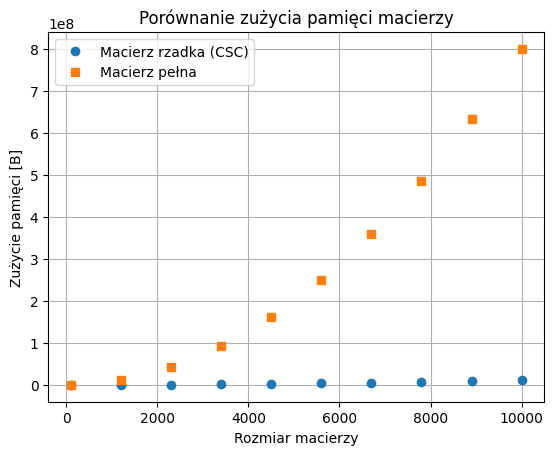

In [12]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt

def memory_csc(mat):
    return (
        mat.data.nbytes +
        mat.indices.nbytes +
        mat.indptr.nbytes
    )

def memory_dense(mat):
    return mat.nbytes


sizes = np.linspace(100, 10000, 10).astype(int)

mem_sparse = []
mem_full = []

for n in sizes:
    A = sp.sparse.random(n, n, density=0.01, format='csc')

    mem_sparse.append(memory_csc(A))
    mem_full.append(memory_dense(A.toarray()))

mem_sparse = np.array(mem_sparse)
mem_full = np.array(mem_full)

plt.figure()
plt.plot(sizes, mem_sparse, 'o', label='Macierz rzadka (CSC)')
plt.plot(sizes, mem_full, 's', label='Macierz pełna')
plt.xlabel('Rozmiar macierzy')
plt.ylabel('Zużycie pamięci [B]')
plt.title('Porównanie zużycia pamięci macierzy')
plt.legend()
plt.grid(True)
plt.show()


---

### **Zadanie 2.**

Korzystając z wiedzy zdobytej podczas realizacji **Zadania 1.** wykonaj polecenia.

1. Wygeneruj macierze rzadkie $\mathbf{A}$ i $\mathbf{B}$ o wymiarach $1000 \times 1000$. Zapisz je w formatach `scipy.sparse.csc_array` oraz `numpy.ndarray`.

2. Porównaj czas potrzebny na wykonanie mnożenia macierzowego $\mathbf{AB}$ dla macierzy zapisanych w formacie `numpy.ndarray` oraz `scipy.sparse.csc_array`.

3. Opisz z czego wynika różnica.

In [13]:
# ===== Twoja implementacja tutaj =====
size=1000
A=sp.sparse.random(size, size, density=0.01, format="csc")
B=sp.sparse.random(size, size, density=0.01, format="csc")
saved_timing_A = %timeit -r 5 -n 10 -o A.toarray()@B.toarray()
print('Czas potrzebny na wymnożenie macierzy w formacie ndarray wynosi: {0: .2f} ms'.format(saved_timing_A.average*1000))
saved_timing_B = %timeit -r 5 -n 10 -o A@B
print('Czas potrzebny na wymnożenie macierzy w formacie rzadkim wynosi: {0: .2f} ms'.format(saved_timing_B.average * 1000))

66.2 ms ± 23.6 ms per loop (mean ± std. dev. of 5 runs, 10 loops each)
Czas potrzebny na wymnożenie macierzy w formacie ndarray wynosi:  66.18 ms
1.24 ms ± 171 μs per loop (mean ± std. dev. of 5 runs, 10 loops each)
Czas potrzebny na wymnożenie macierzy w formacie rzadkim wynosi:  1.24 ms


---

### **Zadanie 3.**

Aby metody iteracyjne znalazły rozwiązanie układu równań $\mathbf{Ax}=\mathbf{b}$ należy zadbać o to aby macierz $\mathbf{A}$ była [diagonalnie zdominowana](https://en.wikipedia.org/wiki/Diagonally_dominant_matrix). Przekształcenie dowolnej macierzy do tej postaci jest skomplikowanym zagadnieniem, które nie będzie poruszane w ramach tego laboratorium. Na potrzeby zadania należy jedynie sprawdzić czy używana macierz posiada tę własność.

**Punkt 1.**

Zaimplementuj funkcję *`is_diagonally_dominant()`* sprawdzającą czy macierz jest diagonalnie zdominowana.

> **Wskazówka:** W implementacji nie należy używać pętli *for*, ponieważ biblioteka NumPy zawiera funkcje, które znacznie wydajniej iterują po elementach tablic typu `numpy.ndarray`. Lepiej skorzystać z funkcji [`np.sum()`](https://numpy.org/doc/stable/reference/generated/numpy.sum.html) oraz [`np.diagonal()`](https://numpy.org/doc/stable/reference/generated/numpy.diagonal.html).

<br>

**Punkt 2.**

Poniżej znajduje się zaimplementowana funkcja `generate_matrix()`. Przy jej pomocy wygeneruj macierz $\mathbf{A}$ o wymiarach $1000 \times 1000$. Następnie zweryfikuj czy wygenerowana macierz jest diagonalnie zdominowana. Wygeneruj również wektor wartości losowych $\mathbf{b}$ o długości $1000$.

<br>

**Punkt 3.**

Istnieje wiele metod iteracyjnego rozwiązywania równań, natomiast nie różnią się one znacząco od siebie w kwestii wywołania metody, dlatego w dalszej części zadania należy wybrać jedną z metod: [GMRES](https://docs.scipy.org/doc/scipy/reference/generated/scipy.sparse.linalg.gmres.html) lub [Conjugate Gradient](https://docs.scipy.org/doc/scipy/reference/generated/scipy.sparse.linalg.cg.html) i dla niej przeprowadzić dalszą analizę. 

1. Korzystając z funkcji *`residual_norm()`*, oraz macierzy zdefiniowanych w **Punkcie 2.**, zbadaj wpływ argumentów `rtol` i `maxiter` na działanie wybranej metody. Sporządź wykresy przedstawiające wartość normy residuum w zależności od zmiany podanych parametrów.

2. Opisz zaobserwowane zależności.

>**Wskazówka:** Metoda *Conjugate Gradient* wymaga aby macierz była dodatnio określona. Można to zapewnić poprzez podanie argumentu `is_symmetric=True` do funkcji `generate_matrix()`.


In [43]:
# Implementacja funkcji generate_matrix().

from scipy.sparse import diags_array, csc_array


def generate_matrix(m: int = 1000, is_symmetric: bool = False) -> csc_array:
    """Funkcja generująca rzadką, diagonalnie zdominowaną macierz rozmiaru m x m.

    Parameters:
        m (int): Wymiar macierzy.
        is_symmetric (bool): Czy macierz ma być symetryczna.

    Returns:
        (scipy.sparse.csc_array): Macierz rzadka, diagonalnie zdominowana (m,m).

    Raises:
        TypeError: Jeśli 'm' nie jest liczbą całkowitą lub 'is_symmetric' nie 
            jest wartością logiczną.
        ValueError: Jeśli 'm' jest mniejsze niż 5.
    """
    if not isinstance(m, int):
        raise TypeError(
            f"Argument 'm' musi być liczbą całkowitą, otrzymano: {type(m).__name__}."
        )
    if not isinstance(is_symmetric, bool):
        raise TypeError(
            f"Argument 'is_symmetric' musi być wartością logiczną, otrzymano: {type(is_symmetric).__name__}."
        )
    if m < 5:
        raise ValueError("Argument 'm' musi być większy lub równy 5.")

    if is_symmetric:
        num_u = np.random.randint(2, m//2)
        num_l = np.random.randint(2, m//2)
        diagonal_values = np.random.rand(num_u)
        matrix = diags(diagonal_values, list(range(0, num_u)), shape=(m, m))
        matrix = matrix + matrix.T
        a = matrix.toarray()
        np.fill_diagonal(
        a,
        np.sum(np.abs(a), axis=1) - np.abs(np.diagonal(a)) + np.random.rand(m)
        )
        return sp.sparse.csc_array(a)
    else:
        num_u = np.random.randint(2, m//2)
        num_l = np.random.randint(2, m//2)
        diagonal_values = np.random.rand(num_u + num_l)
        matrix = diags(diagonal_values, list(range(-num_l, num_u)), shape=(m,m))
        a = matrix.toarray()
        np.fill_diagonal(
        a,
        np.sum(np.abs(a), axis=1) - np.abs(np.diagonal(a)) + np.random.rand(m)
        )
        return sp.sparse.csc_array(a)
A_3 = generate_matrix(1000, True)

In [44]:
# ===== Twoja implementacja tutaj =====
A_3 = generate_matrix(1000, True)
if main.is_diagonally_dominant(A_3):

    print("Macierz A spełnia warunek dominacji diagonalnej.")

    rhs = np.random.rand(1000)
    A_dense = A_3.toarray()

    # rozwiązanie dla ustawień domyślnych GMRES
    sol_default, _ = sp.sparse.linalg.gmres(A_3, rhs)
    ref_norm = main.residual_norm(A_dense, sol_default, rhs)

    # analiza wpływu tolerancji
    tol_values = np.logspace(-4, 3, 8)
    norm_tol = []

    for t in tol_values:
        sol_t, _ = sp.sparse.linalg.gmres(A_3, rhs, tol=t)
        norm_tol.append(main.residual_norm(A_dense, sol_t, rhs))

    norm_tol = np.array(norm_tol)

    fig1, ax1 = plt.subplots()
    ax1.semilogx(tol_values, norm_tol, 'o', label='Zmienna tolerancja')
    ax1.axhline(ref_norm, label='Ustawienie domyślne')
    ax1.set_xlabel('Parametr tol')
    ax1.set_ylabel('Norma residuum')
    ax1.set_title('Wpływ tolerancji na normę residuum (GMRES)')
    ax1.grid(True)
    ax1.legend()

    # analiza wpływu liczby iteracji
    iter_values = np.arange(1, 51)
    norm_iter = []

    for it in iter_values:
        sol_it, _ = sp.sparse.linalg.gmres(
            A_3, rhs, maxiter=it, restart=1
        )
        norm_iter.append(main.residual_norm(A_dense, sol_it, rhs))

    norm_iter = np.array(norm_iter)

    fig2, ax2 = plt.subplots()
    ax2.plot(iter_values, norm_iter, 'o', label='Zmienna liczba iteracji')
    ax2.axhline(ref_norm, label='Ustawienie domyślne')
    ax2.set_xlabel('Parametr maxiter')
    ax2.set_ylabel('Norma residuum')
    ax2.set_title('Wpływ liczby iteracji na normę residuum (GMRES)')
    ax2.grid(True)
    ax2.legend()

else:
    print("Macierz A nie jest diagonalnie zdominowana.")

Macierz A nie jest diagonalnie zdominowana.


---

**Materiały uzupełniające:**
- [Scipy Lecture Notes](http://www.scipy-lectures.org/index.html)
- [NumPy for Matlab users](https://docs.scipy.org/doc/numpy/user/numpy-for-matlab-users.html#numpy-for-matlab-users)
- [Python Tutorial - W3Schools](https://www.w3schools.com/python/default.asp)
- [NumPy](https://www.numpy.org)
- [Matplotlib](https://matplotlib.org/)
- [Anaconda](https://www.anaconda.com/)
- [Learn Python for Data Science](https://www.datacamp.com/learn-python-with-anaconda?utm_source=Anaconda_download&utm_campaign=datacamp_training&utm_medium=banner)
- [Learn Python](https://www.learnpython.org/)
- [Wujek Google](https://google.pl) i [Ciocia Wikipedia](https://pl.wikipedia.org/wiki/Wikipedia:Strona_g%C5%82%C3%B3wna)